In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Average distance between two points in the square

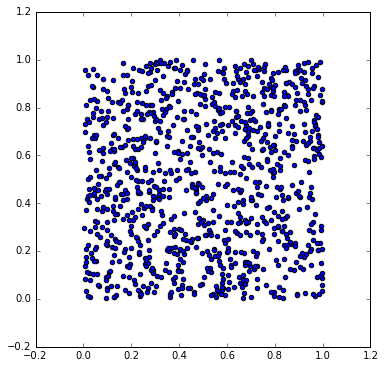

In [2]:
count = 1000
x = [np.random.uniform() for i in range(count)]
y = [np.random.uniform() for i in range(count)]
colors = (0,0,0)
plt.figure(figsize=(6, 6))
plt.scatter(x,y)

In [3]:
def randSqDist():
    x1 = np.random.uniform()
    x2 = np.random.uniform()
    y1 = np.random.uniform()
    y2 = np.random.uniform()
    return np.sqrt(np.square(x1 - y1) + np.square(x2 - y2))

In [4]:
count = 100000
q = [randSqDist() for i in range(count)]
np.average(q)

0.52237495594929528

### Average distances and angles in the n-cube

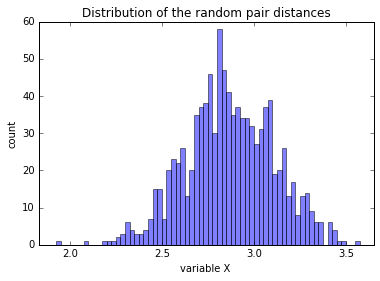

In [5]:
def dCube_uniform(d:int):
    return np.array([np.random.uniform() - 0.5 for i in range(d)])

def dCube_drawDist(d:int):
    a = dCube_uniform(d)
    b = dCube_uniform(d)
    return np.linalg.norm(a-b)

bins = np.arange(0, 10, 0.025) # fixed bin size
data =[dCube_drawDist(50) for i in range(1000)]
plt.xlim([min(data) - 0.1, max(data) + 0.1])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Distribution of the random pair distances')
plt.xlabel('variable X ')
plt.ylabel('count')

plt.show()

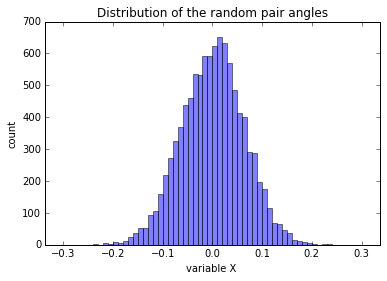

In [6]:
def dCube_drawAngle(d:int):
    a = dCube_uniform(d)
    b = dCube_uniform(d)
    return np.inner(a,b) / np.sqrt(np.inner(a,a) * np.inner(b,b))

bins = np.arange(-4, 4, 0.01) # fixed bin size
data =[dCube_drawAngle(256) for i in range(10000)]
plt.xlim([min(data) - 0.1, max(data) + 0.1])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Distribution of the random pair angles')
plt.xlabel('variable X ')
plt.ylabel('count')

plt.show()

#### Create two orthonormal vectors, randomly distributed over the dim-sphere

In [7]:
def randomOrthoNormalPair(dim:int) :
    a = np.random.randn(dim)
    b = np.random.randn(dim)
    orthoA = b - a * np.dot(a, b) / np.square(np.linalg.norm(a))
    return (a / np.linalg.norm(a), orthoA / np.linalg.norm(orthoA))

In [8]:
testPairs = [randomOrthoNormalPair(12) for i in range(10)]

In [9]:
[(np.dot(a, a), np.dot(b, b), np.dot(a, b)) for a, b in testPairs]

[(1.0, 1.0, 3.5995512126518747e-17),
 (0.99999999999999989, 0.99999999999999956, 9.1072982488782372e-17),
 (1.0000000000000002, 1.0, 2.6367796834847468e-16),
 (1.0, 0.99999999999999989, -6.4184768611141862e-17),
 (0.99999999999999989, 1.0000000000000002, -2.688821387764051e-17),
 (1.0, 1.0000000000000002, -6.9388939039072284e-17),
 (0.99999999999999989, 0.99999999999999978, -2.2551405187698492e-17),
 (1.0000000000000002, 0.99999999999999989, 9.0205620750793969e-17),
 (1.0000000000000002, 0.99999999999999978, 2.4980018054066022e-16),
 (0.99999999999999989, 1.0000000000000002, -1.1221492485224971e-16)]